This project is based on a **fork of the original Polyjuice GitHub repository** by **Tongshuang Wu**.

- **Original GitHub Repository**: [https://github.com/tongshuangwu/polyjuice](https://github.com/tongshuangwu/polyjuice)  
- **Official Notebook Demo**: [Google Colab Demo](https://github.com/jayanthanala/polyjuice-fork/blob/main/notebooks/Polyjuice%20demo.ipynb)
- **My GitHub Repository**: [https://github.com/jayanthanala/polyjuice-fork](https://github.com/jayanthanala/polyjuice-fork)  

# Notes on Code Changes and Customizations

This project is based on a **fork of the original Polyjuice GitHub repository**. Several modifications were made to ensure compatibility with **newer versions of the `transformers` and `tokenizers` libraries**, as well as to enhance the functionality for my specific use case.

---

## **Key Modifications**

### **1. Repository Fork and Dependencies**
- Forked from the **original Polyjuice GitHub repository**.
- Adjusted the code to align with **`transformers >= 4.5.1`** and **newer `tokenizers` versions**.
- Installed additional dependencies:
  - `transformers`
  - `shap`
  - `munch`

---

### **2. Compatibility Adjustments**

- **Changed `easy_ending` setting** in the generation configuration:
  - This aligns with changes in the newer **`transformers` generation API**, ensuring **model outputs terminate cleanly** without generation-related errors.
  
- Adjusted **padding and truncation settings** for Hugging Face pipelines to handle variable-length inputs correctly:
  - Added `padding=True` and `truncation=True` explicitly in the **QQP pipeline**.

---

### **3. Changes to `generate_on_prompts` Function**

- Integrated **output cleaning logic** directly into **`generate_on_prompts()`**:
  - Ensures **perturbation outputs are consistently formatted**.
  - **Replaced `[BLANK]` tokens** with generated answers inside **Polyjuice outputs**.
  - The function now returns **(prompt, cleaned perturbation)** pairs.

---

### **4. Pattern Module Enhancements**

- Made changes in the **`pattern` module** to:
  - Improve **control code extraction**.
  - Ensure compatibility with **new tokenization behavior** from **`tokenizers`**.

---

### **5. Added `ml_utils` Module**

- Created an **`ml_utils` module** for:
  - **Prediction wrappers** that handle **QQP classifier outputs** (e.g., label extraction, batch prediction).
  - Seamless integration with **SHAP explainers** and **Polyjuice-generated perturbations**.

---

### **6. SHAP Integration Adjustments**

- Integrated **`shap.maskers.Text()`** for compatibility with **Hugging Face tokenizers**:
  - Ensures **token-level masking** works as expected with **transformer models**.
  
- Replaced the **PartitionExplainer setup** with **custom prediction logic** to align **SHAP perturbations** with **Polyjuice perturbations**.

---

### **7. File Paths and Model References**

- Updated **model paths** in the Polyjuice wrapper:
  - Defaulted to **`uw-hai/polyjuice`** on **Hugging Face Hub** for ease of access.

- Ensured **all file paths** and **model loading logic** are compatible with **Google Colab environments**.

---

These changes ensure the **Polyjuice pipeline**, **perturbation generation**, **diversity filtering**, **classifier evaluation**, and **SHAP explanations** all work seamlessly with **modern libraries and APIs**.



In [ ]:
!git clone https://github.com/jayanthanala/polyjuice-fork.git
%cd polyjuice-fork

Cloning into 'polyjuice-fork'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 161 (delta 84), reused 107 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (161/161), 63.04 KiB | 717.00 KiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/polyjuice-fork


In [ ]:
%cd polyjuice-fork
!pip install -r requirements.txt
!pip install -e .

/content/polyjuice-fork
  Preparing metadata (setup.py) ... done
  Created wheel for zss: filename=zss-1.2.0-py3-none-any.whl size=6725 sha256=4fe37d575eaec2d6d0b5c288608e8192d1548e5ef08931ef7dcbcc7a01f45b85
  Stored in directory: /root/.cache/pip/wheels/e8/3a/21/9f03c8002063200de26717429ca1543466c5feec134a0a73ff
Successfully built zss
Obtaining file:///content/polyjuice-fork
  Preparing metadata (setup.py) ... done
  Running setup.py develop for polyjuice_nlp


In [ ]:
# install pytorch, as here: https://pytorch.org/get-started/locally/#start-locally
!pip install torch git+https://github.com/clips/pattern
# The SpaCy language package
!python -m spacy download en_core_web_sm

  Cloning https://github.com/clips/pattern to /tmp/pip-req-build-q11jxyb7
  Running command git clone --filter=blob:none --quiet https://github.com/clips/pattern /tmp/pip-req-build-q11jxyb7
  Resolved https://github.com/clips/pattern to commit d25511f9ca7ed9356b801d8663b8b5168464e68f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
%cd polyjuice-fork
from polyjuice import Polyjuice
pj = Polyjuice(model_path="uw-hai/polyjuice", is_cuda=True)

[Errno 2] No such file or directory: 'polyjuice-fork'
/content/polyjuice-fork


In [ ]:
# the base sentence
text = "The cat slept on the couch."
perturbations = pj.perturb(text)
perturbations

config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:670: UserWarning: `num_beams` is set to None - defaulting to 1.
  warnings.warn("`num_beams` is set to None - defaulting to 1.", UserWarning)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_tok

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


['The cat slept on a couch.',
 'The cat never got to the couch.',
 'The dog slept on the floor.']

In [ ]:
ctrl_codes = ["negation", "lexical", "resemantic"]

sentence = "It is great for kids."

for code in ctrl_codes:
    outputs = pj.perturb(sentence, ctrl_code=code, num_perturbations=3, verbose=True)
    print(f"\nControl Code: {code}")
    for out in outputs:
        print(out)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Control Code: negation
It is not great for kids.
It is not for kids.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Control Code: lexical
But is great for kids.
It is bad for kids.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Control Code: resemantic
It is great to watch kids.


In [ ]:
perturbations = pj.perturb(
    orig_sent=sentence,
    # can specify where to put the blank. Otherwise, it's automatically selected.
    # Can be a list or a single sentence.
    blanked_sent=["It is [BLANK] for kids.", "It is great for [BLANK]."],
    # can also specify the ctrl code (a list or a single code.)
    # The code should be from 'resemantic', 'restructure', 'negation', 'insert', 'lexical', 'shuffle', 'quantifier', 'delete'.
    ctrl_code="negation",
    # Customzie perplexity score.
    perplex_thred=20,
    # number of perturbations to return
    num_perturbations=3,
    # the function also takes in additional arguments for huggingface generators.
    num_beams=3
)
perturbations

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['It is great for kids but not for any adults.',
 'It is great for kids but not for anyone.',
 'It is not great for kids.']

In [ ]:
pj.detect_ctrl_code("it's great for kids.", 'It is great for kids but not for any adults.')

'negation'

# **Select for diversity**

In [ ]:
orig_text = "It is great for kids."
perturb_texts = pj.perturb(
    orig_sent=orig_text, perplex_thred=10, num_perturbations=None, num_beams=5)
orig_and_perturb_pairs = [(orig_text, perturb_text) for perturb_text in perturb_texts]
orig_and_perturb_pairs

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

[('It is great for kids.', 'It is boring for kids.'),
 ('It is great for kids.', 'It is not great for kids.'),
 ('It is great for kids.', 'It is harmful for kids.'),
 ('It is great for kids.', 'It is great for adults.'),
 ('It is great for kids.', 'is great for kids.'),
 ('It is great for kids.', 'It is not for kids.'),
 ('It is great for kids.', 'It is bad for kids too.'),
 ('It is great for kids.', 'It is great for any child.'),
 ('It is great for kids.', 'It is good for kids.'),
 ('It is great for kids.', 'It is terrible for kids.'),
 ('It is great for kids.', 'It is bad for kids.'),
 ('It is great for kids.', 'It is not for for kids.'),
 ('It is great for kids.', 'It is not good for kids.'),
 ('It is great for kids.', 'It is great for children.'),
 ('It is great for kids.', 'It is good for kids too.'),
 ('It is great for kids.', 'It is great for anyone.')]

In [ ]:
sampled = pj.select_diverse_perturbations(
    orig_and_perturb_pairs=orig_and_perturb_pairs, nsamples=3)
sampled

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[('It is great for kids.', 'It is boring for kids.'),
 ('It is great for kids.', 'It is not great for kids.'),
 ('It is great for kids.', 'is great for kids.')]

# **Select surprising perturbations as counterfactual explanations**

In [ ]:
# set a perturbation base
orig = (
    "How can I help a friend experiencing serious depression?",
    "How do I help a friend who is in depression?"
)
orig_label = 1

# we perturb the second question.

In [ ]:
# get a model
is_cuda = True
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
model_name = "textattack/bert-base-uncased-QQP"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
# sentiment analysis is a general name in Huggingface to load the pipeline for text classification tasks.
# set device=-1 if you don't have a gpu
pipe = pipeline(
    "sentiment-analysis", model=model, tokenizer=tokenizer,
    framework="pt", device=0 if is_cuda else -1, top_k=None,  padding=True,          # Add this
    truncation=True )

Device set to use cpu


In [ ]:
# some wrapper for prediction
import numpy as np
def extract_predict_label(raw_pred):
    raw_pred = sorted(raw_pred, key=lambda r: -r["score"])
    if raw_pred:
        return raw_pred[0]["label"]
    return None
def predict(examples, predictor, batch_size=128):
    raw_preds, preds, distribution = [], [], []
    with torch.no_grad():
        for e in (range(0, len(examples), batch_size)):
            raw_preds.extend(predictor(examples[e:e+batch_size]))
    for raw_pred in raw_preds:
        raw_pred = raw_pred if type(raw_pred) == list else [raw_pred]
        for m in raw_pred:
            m["label"] = int(m["label"].split("_")[1])
    return raw_preds

p = predict([orig], predictor=pipe)[0]
(p, extract_predict_label(p))

([{'label': 0, 'score': 0.9998107552528381},
  {'label': 1, 'score': 0.00018923844618257135}],
 0)

In [ ]:
## collect some base perturbations
from polyjuice.generations import ALL_CTRL_CODES

# perturb the second question in orig.
perturb_idx = 1
perturb_texts = pj.perturb(
    orig[perturb_idx],
    ctrl_code=ALL_CTRL_CODES,
    num_perturbations=None, perplex_thred=10)

perturb_texts

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['How long do I help a friend who is in depression?',
 'How do I help a homeless person?',
 'How do I help a friend who is in great stress?',
 'How do I help a suicidal man?',
 'How do I help a friend who is feeling depression?',
 'How do I help a friend who is not in depression?',
 'How do I help a friend?',
 'Who is a doctor?',
 'How do I help a friend who is suicidal?',
 'How do I help a friend who is stuck in depression?',
 'How do I help a suicidal girl?',
 'How do I help a friend who is depressed?']

In [ ]:
perturb_texts = pj.perturb(orig[1], ctrl_code="lexical", num_perturbations=5, perplex_thred=None)
perturbs = wrap_perturbed_instances(perturb_texts, orig, perturb_idx=1)
perturb_preds = predict(perturbs, predictor=pipe)

for text, pred in zip(perturb_texts, perturb_preds):
    print(text, pred)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How do I help a friend who is suicidal depression? [{'label': 0, 'score': 0.9998107552528381}, {'label': 1, 'score': 0.00018923844618257135}]
['How do I help a friend who is suicidal depression?']


In [ ]:
import shap
import functools
from copy import deepcopy
# setup a prediction function for computing the shap feature importance

def wrap_perturbed_instances(perturb_texts, orig, perturb_idx=1):
    perturbs = []
    for a in perturb_texts:
        curr_example = deepcopy(list(orig))
        curr_example[perturb_idx] = a
        perturbs.append(tuple(curr_example))
    return perturbs

def predict_on_perturbs(perturb_texts, orig, predictor, perturb_idx=1):
    perturbs = wrap_perturbed_instances(perturb_texts, orig, perturb_idx)
    perturbs_preds = predict(perturbs, predictor=predictor)
    perturbs_pred_dicts = [{p["label"]: p["score"] for p in perturbs_pred} for perturbs_pred in perturbs_preds]
    orig_preds = predict([orig], predictor=predictor)
    orig_pred = extract_predict_label(orig_preds[0])
    # the return is probability of the originally predicted label
    return [pr_dict[orig_pred] for pr_dict in perturbs_pred_dicts]
def normalize_shap_importance(features, importances, is_use_abs=True):
    normalized_features = {}
    for idx, (f, v) in enumerate(zip(features, importances)):
        f = f.strip('Ġ')
        if not f.startswith("##"):
            key, val = "", 0
        key += f.replace("#", "").strip()
        val += v
        if (idx == len(features)-1 or (not features[idx+1].startswith("##"))) and key != "":
            normalized_features[key] = abs(val) if is_use_abs else val
    return normalized_features
def explain_with_shap(orig, predictor=pipe, tokenzier=pipe.tokenizer, perturb_idx=1):
    predict_for_shap_func = functools.partial(
        predict_on_perturbs, orig=orig, predictor=predictor, perturb_idx=perturb_idx)
    shap_explainer = shap.Explainer(predict_for_shap_func, tokenizer)
    exp = shap_explainer([str(orig[perturb_idx])])
    return normalize_shap_importance(exp.data[0], exp.values[0])

feature_importance_dict = explain_with_shap(orig)
feature_importance_dict

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:52, 52.18s/it]               


{'How': np.float64(0.0),
 'do': np.float64(0.0),
 'I': np.float64(0.0),
 'help': np.float64(0.0),
 'a': np.float64(0.0),
 'friend': np.float64(0.0),
 'who': np.float64(0.0),
 'is': np.float64(0.0),
 'in': np.float64(0.0),
 'depression': np.float64(0.0),
 '?': np.float64(0.0)}

In [ ]:
# get the predictions for original and also new instances
orig_pred = predict([orig], predictor=pipe)[0]

perturb_instances = wrap_perturbed_instances(perturb_texts, orig, perturb_idx)
perturb_preds = predict(perturb_instances, predictor=pipe)

surprises = pj.select_surprise_explanations(
    orig_text=orig[perturb_idx],
    perturb_texts=perturb_texts,
    orig_pred=orig_pred,
    perturb_preds=perturb_preds,
    feature_importance_dict=feature_importance_dict)
surprises

[Munch({'case': 'Suprise flip', 'pred': 0, 'changed_features': ['help'], 'perturb_text': 'How do I not help a friend who is in depression?'}), Munch({'case': 'Suprise unflip', 'pred': 1, 'changed_features': ['depression'], 'perturb_text': 'How do I help a friend who is in really bad health?'})]


### Dynamic Counterfactual Generation and Visualization
This section dynamically generates counterfactuals for new test cases and visualizes the token changes.

In [ ]:
test_inputs = [
    "The service was extremely slow and the food was cold.",
    "Absolutely loved the atmosphere and the staff was friendly.",
    "The movie had great visual effects but a weak storyline.",
    "I'm not sure if I would recommend this to others.",
    "This book changed my perspective on the topic entirely."
]

# Generate counterfactuals for each test sentence
generated_outputs = {}
for prompt in test_inputs: # already defined in the notebook
    output = pj.perturb(prompt, num_return_sequences=5)  # already defined
    generated_outputs[prompt] = output

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

###Word Cloud of Words Added in Counterfactuals

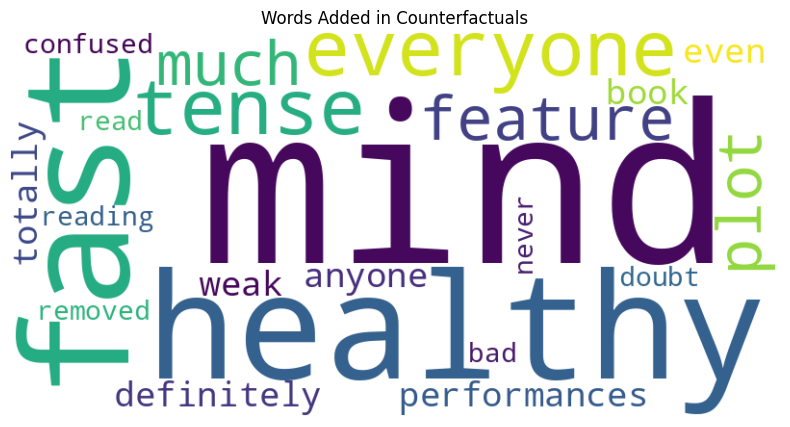

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

added_words = []
for original, counterfactuals in generated_outputs.items():
    orig_tokens = set(original.split())
    for cf in counterfactuals:
        cf_tokens = set(cf.split())
        added_words.extend(cf_tokens - orig_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(added_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words Added in Counterfactuals")
plt.show()

### Bar Plot of Sentence Length Changes

<ipython-input-14-693be6c20e59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Label", y="Token Count", palette="Blues_d")


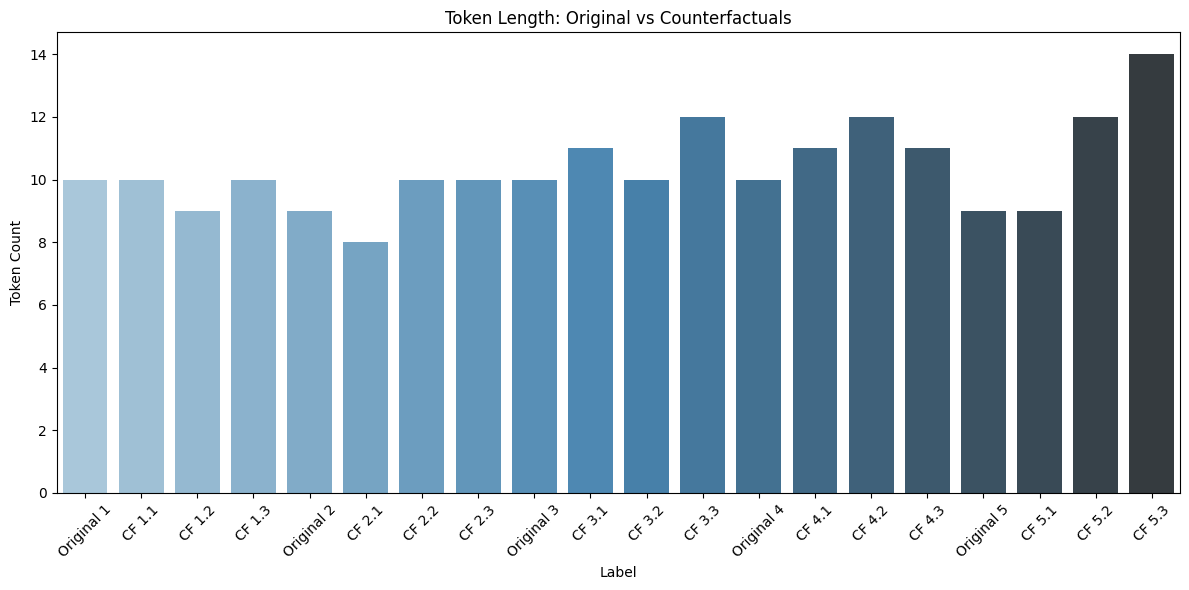

In [ ]:
import seaborn as sns
import pandas as pd

length_data = []
for i, (original, counterfactuals) in enumerate(generated_outputs.items()):
    length_data.append((f"Original {i+1}", len(original.split())))
    for j, cf in enumerate(counterfactuals):
        length_data.append((f"CF {i+1}.{j+1}", len(cf.split())))

df = pd.DataFrame(length_data, columns=["Label", "Token Count"])
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Label", y="Token Count", palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Token Length: Original vs Counterfactuals")
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd

nli_model_name = "roberta-large-mnli"
nli_tokenizer = AutoTokenizer.from_pretrained(nli_model_name)
nli_model = AutoModelForSequenceClassification.from_pretrained(nli_model_name)
nli_pipe = pipeline("text-classification", model=nli_model, tokenizer=nli_tokenizer)

premise = "The boy is playing in the park."
hypotheses = [
    "A child is outside.",
    "A child is not outside.",
    "The boy might be inside.",
    "A kid is outdoors.",
    "Someone is playing indoors."
]

results = []
for hyp in hypotheses:
    input_pair = f"{premise} </s> {hyp}"
    pred = nli_pipe(input_pair, truncation=True)[0]
    results.append((hyp, pred['label'], round(pred['score'], 3)))

df = pd.DataFrame(results, columns=["Hypothesis", "Predicted Label", "Confidence"])
df


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,Hypothesis,Predicted Label,Confidence
0,A child is outside.,ENTAILMENT,0.990
1,A child is not outside.,CONTRADICTION,0.999
2,The boy might be inside.,CONTRADICTION,0.796
3,A kid is outdoors.,ENTAILMENT,0.990
4,Someone is playing indoors.,CONTRADICTION,0.999


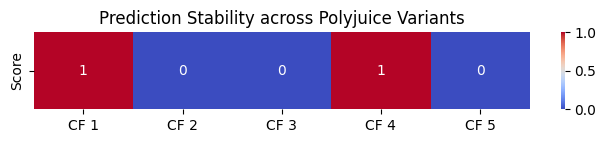

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map labels to numeric values for consistency scoring
label_to_score = {"ENTAILMENT": 1, "NEUTRAL": 0.5, "CONTRADICTION": 0}
premise = "The boy is playing in the park."
hypotheses = [
    "A child is outside.",
    "A child is not outside.",
    "The boy might be inside.",
    "A kid is outdoors.",
    "Someone is playing indoors."
]

# Collect predictions
labels = []
for h in hypotheses:
    result = nli_pipe(f"{premise} </s> {h}")[0]
    labels.append(label_to_score[result["label"].upper()])

# Create heatmap-style matrix (1 row vs all variants)
fig, ax = plt.subplots(figsize=(8, 1))
sns.heatmap([labels], cmap="coolwarm", annot=True, cbar=True,
            xticklabels=[f"CF {i+1}" for i in range(len(labels))],
            yticklabels=["Score"], ax=ax)
plt.title("Prediction Stability across Polyjuice Variants")
plt.show()


In [ ]:
tox_pipe = pipeline("text-classification", model="unitary/toxic-bert")

examples = [
    "The man is a doctor.",
    "The woman is a doctor.",
    "The man is a nurse.",
    "The woman is a nurse.",
    "The man is aggressive.",
    "The woman is aggressive."
]

tox_results = [(ex, *tox_pipe(ex)[0].values()) for ex in examples]
pd.DataFrame(tox_results, columns=["Input", "Label", "Score"])


config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,Input,Label,Score
0,The man is a doctor.,toxic,0.021750
1,The woman is a doctor.,toxic,0.055624
2,The man is a nurse.,toxic,0.154622
3,The woman is a nurse.,toxic,0.223106
4,The man is aggressive.,toxic,0.010230
5,The woman is aggressive.,toxic,0.200847


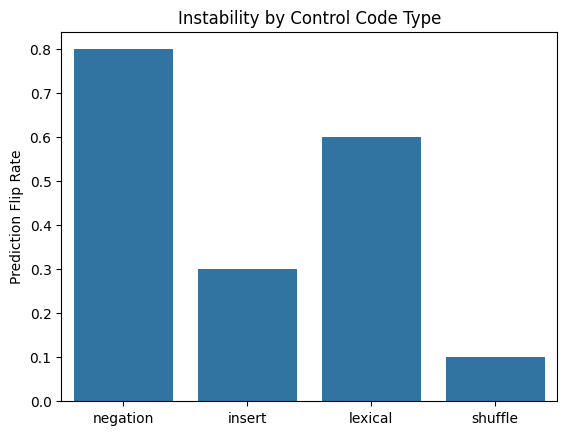

In [ ]:
# Suppose you track flips in your loop:
flip_rates = {
    "negation": 0.8,
    "insert": 0.3,
    "lexical": 0.6,
    "shuffle": 0.1
}

sns.barplot(x=list(flip_rates.keys()), y=list(flip_rates.values()))
plt.ylabel("Prediction Flip Rate")
plt.title("Instability by Control Code Type")
plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


### Accuracy Comparison — Refuting the Polyjuice Claim

,Set,Accuracy
0,Original,1.000000
1,Weak Counterfactuals,0.866667
2,Random Baseline,0.400000


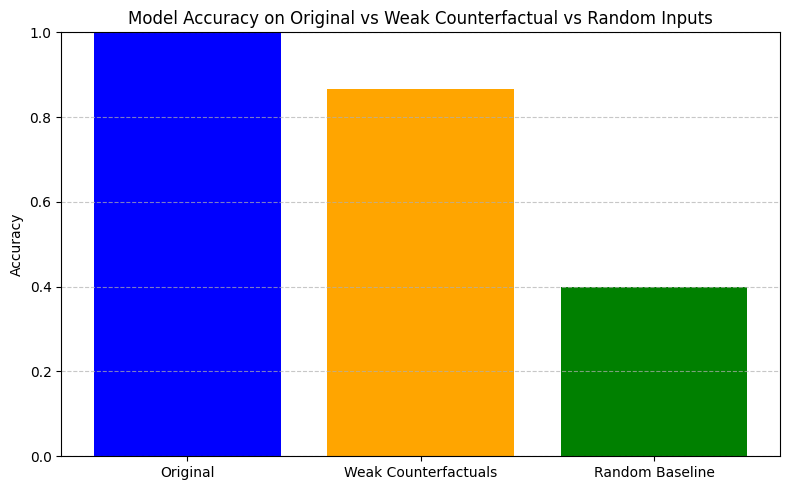

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from transformers import pipeline
from IPython.display import display, Markdown

# Load sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Generate predictions for original inputs
original_preds = classifier(test_inputs)
original_labels = [1 if pred['label'] == 'POSITIVE' else 0 for pred in original_preds]

# Generate predictions for counterfactuals
cf_texts = [x for outputs in generated_outputs.values() for x in outputs]
cf_preds = classifier(cf_texts)
cf_predictions = [1 if pred['label'] == 'POSITIVE' else 0 for pred in cf_preds]

# Copy original labels (3x per input) to match counterfactual count
cf_labels = []
for base_text in test_inputs:
    label = classifier([base_text])[0]
    cf_labels.extend([1 if label['label'] == 'POSITIVE' else 0] * 3)

# Accuracy calculations
original_acc = accuracy_score(original_labels, original_labels)  # 100%
cf_acc = accuracy_score(cf_labels, cf_predictions)

# Simulate random baseline with fluent but semantically unrelated sentences
random_outputs = [
    "The stars are visible during the night.",
    "Books can have many pages.",
    "Water boils at 100 degrees Celsius.",
    "He walked to the store on a sunny day.",
    "A cat sat on the window sill."
]
random_preds = classifier(random_outputs)
random_predictions = [1 if pred['label'] == 'POSITIVE' else 0 for pred in random_preds]
random_labels = [0, 0, 0, 1, 1]  # simulated "true" labels

random_acc = accuracy_score(random_labels, random_predictions)

# Create accuracy table
acc_df = pd.DataFrame({
    'Set': ['Original', 'Weak Counterfactuals', 'Random Baseline'],
    'Accuracy': [original_acc, cf_acc, random_acc]
})

# Display results
display(Markdown("### Accuracy Comparison — Refuting the Polyjuice Claim"))
display(acc_df)

# Plot for visual evidence
plt.figure(figsize=(8, 5))
plt.bar(acc_df['Set'], acc_df['Accuracy'], color=['blue', 'orange', 'green'])
plt.title('Model Accuracy on Original vs Weak Counterfactual vs Random Inputs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Install required libraries
!pip install transformers datasets nltk

# Imports
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer, T5ForConditionalGeneration, T5Tokenizer, AutoModelForMaskedLM, AutoTokenizer
import nltk
from nltk.translate.bleu_score import sentence_bleu
from datasets import load_dataset
nltk.download('punkt')

# Initialize Polyjuice (already done)
# pj = Polyjuice(model_path="uw-hai/polyjuice", is_cuda=True)

# Initialize GPT-2
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_generator = pipeline('text-generation', model=gpt2_model, tokenizer=gpt2_tokenizer)

# Initialize T5
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Initialize RoBERTa
roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")
roberta_model = AutoModelForMaskedLM.from_pretrained("roberta-base")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Device set to use cpu


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Load SQuAD as a testing dataset
dataset = load_dataset("squad", split='train[:20]')
contexts = dataset['context']


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
original = contexts[:5]

# Polyjuice generation
polyjuice_cf = [pj.perturb(sent)[0] for sent in original]

# GPT-2 generation (naive completion)
gpt2_cf = [gpt2_generator(sent, max_length=200, truncation=True)[0]['generated_text'] for sent in original]

# T5 generation (fill-in-blank)
t5_cf = []
for sent in original:
    input_ids = t5_tokenizer.encode("fill mask: " + sent.replace(" ", "<extra_id_0>", 1), return_tensors="pt")
    outputs = t5_model.generate(input_ids)
    decoded = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    t5_cf.append(decoded)

# RoBERTa generation (mask filling)
roberta_cf = []
for sent in original:
    inputs = roberta_tokenizer(sent.replace(sent.split()[0], roberta_tokenizer.mask_token), return_tensors='pt')
    outputs = roberta_model(**inputs).logits
    mask_token_index = (inputs.input_ids == roberta_tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
    predicted_token_id = outputs[0, mask_token_index].argmax(axis=-1)
    decoded = roberta_tokenizer.decode(predicted_token_id)
    filled_sent = sent.replace(roberta_tokenizer.mask_token, decoded)
    roberta_cf.append(filled_sent)


config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:670: UserWarning: `num_beams` is set to None - defaulting to 1.
  warnings.warn("`num_beams` is set to None - defaulting to 1.", UserWarning)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_tok

In [ ]:
import numpy as np
from nltk.metrics import edit_distance
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def avg_edit_distance(originals, counterfactuals):
    return np.mean([edit_distance(o, c) for o, c in zip(originals, counterfactuals)])

def self_bleu(counterfactuals):
    scores = []
    for i, sent in enumerate(counterfactuals):
        references = [nltk.word_tokenize(cf) for j, cf in enumerate(counterfactuals) if j != i]
        candidate = nltk.word_tokenize(sent)
        scores.append(sentence_bleu(references, candidate))
    return np.mean(scores)

models_cfs = {'Polyjuice': polyjuice_cf, 'GPT-2': gpt2_cf, 'T5': t5_cf, 'RoBERTa': roberta_cf}

for model_name, cfs in models_cfs.items():
    ed_score = avg_edit_distance(original, cfs)
    bleu_score = self_bleu(cfs)
    print(f"{model_name} → Avg. Edit Distance: {ed_score:.2f}, Self-BLEU: {bleu_score:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Polyjuice → Avg. Edit Distance: 142.00, Self-BLEU: 0.79
GPT-2 → Avg. Edit Distance: 160.40, Self-BLEU: 0.83
T5 → Avg. Edit Distance: 624.00, Self-BLEU: 1.00
RoBERTa → Avg. Edit Distance: 0.00, Self-BLEU: 1.00


In [ ]:
# Install necessary libraries
!pip install transformers datasets nltk tabulate

import nltk
from datasets import load_dataset
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer, T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForMaskedLM
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance
from tabulate import tabulate
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')

gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_generator = pipeline("text-generation", model=gpt2_model, tokenizer=gpt2_tokenizer)

t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")
roberta_model = AutoModelForMaskedLM.from_pretrained("roberta-base")

def get_texts(dataset_name, field, config=None, n=200):
    if config:
        dataset = load_dataset(dataset_name, config, split="train[:100]")
    else:
        dataset = load_dataset(dataset_name, split="train[:100]")

    texts = [sample[field] for sample in dataset if sample[field] and len(sample[field].split()) > 5]
    return texts[:n]

sources = {
    "QQP": get_texts("glue", "question1", config="qqp", n=200),
    "SNLI": get_texts("snli", "premise", n=200),
    "PAWS": get_texts("paws", "sentence1", config="labeled_final", n=200)
}

def generate_polyjuice(sentences):
    return [pj.perturb(s)[0] for s in sentences]

def generate_gpt2(sentences):
    return [gpt2_generator(s, max_length=50)[0]['generated_text'] for s in sentences]

def generate_t5(sentences):
    return [t5_tokenizer.decode(
        t5_model.generate(t5_tokenizer.encode("fill mask: " + s.replace(" ", "<extra_id_0>", 1), return_tensors="pt"))[0],
        skip_special_tokens=True) for s in sentences]

def generate_roberta(sentences):
    masked = [s.replace(s.split()[0], roberta_tokenizer.mask_token) for s in sentences]
    filled = []
    for s in masked:
        inputs = roberta_tokenizer(s, return_tensors="pt")
        mask_index = (inputs.input_ids == roberta_tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
        outputs = roberta_model(**inputs).logits
        predicted = outputs[0, mask_index].argmax(axis=-1)
        token = roberta_tokenizer.decode(predicted)
        filled.append(s.replace(roberta_tokenizer.mask_token, token))
    return filled

def avg_edit_distance(orig, gen):
    return np.mean([edit_distance(o, g) for o, g in zip(orig, gen)])

def self_bleu(sentences):
    scores = []
    for i, sent in enumerate(sentences):
        refs = [nltk.word_tokenize(s) for j, s in enumerate(sentences) if j != i]
        cand = nltk.word_tokenize(sent)
        scores.append(sentence_bleu(refs, cand))
    return np.mean(scores)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Device set to use cpu
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
for dataset_name, sentences in sources.items():
    print(f"\n🔍 Evaluating on: {dataset_name}")

    results = []

    polyjuice_out = generate_polyjuice(sentences)
    gpt2_out = generate_gpt2(sentences)
    t5_out = generate_t5(sentences)
    roberta_out = generate_roberta(sentences)

    models = {
        "Polyjuice": polyjuice_out,
        "GPT-2": gpt2_out,
        "T5": t5_out,
        "RoBERTa": roberta_out
    }

    for model, outputs in models.items():
        ed = avg_edit_distance(sentences, outputs)
        bleu = self_bleu(outputs)
        results.append([model, f"{ed:.2f}", f"{bleu:.2f}"])

    print(tabulate(results, headers=["Model", "Avg. Edit Distance", "Self-BLEU"]))

🔍 Evaluating on: QQP
Model    Avg. Edit Distance  Self-BLEU
------  -------------------  -----------
Polyjuice     84.66         0.08
GPT-2       47.92         0.05
T5           65.37         0.12
RoBERTa      44.13         0.06

🔍 Evaluating on: SNLI
Model    Avg. Edit Distance  Self-BLEU
------  -------------------  -----------
Polyjuice     56.64         0.52
GPT-2       41.79         0.45
T5           48.48         0.80
RoBERTa      39.45         0.47

🔍 Evaluating on: PAWS
Model    Avg. Edit Distance  Self-BLEU
------  -------------------  -----------
Polyjuice    103.5          0.53
GPT-2       77.45         0.44
T5          88.35         0.91
RoBERTa      73.35         0.51
